## Main Coding

MA Graph of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Prediction of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2023-10-20    101.610001
2023-10-21    100.339996
2023-10-22     96.110001
2023-10-23    105.720001
2023-10-26     97.379997
2023-10-27     94.509998
2023-10-28    105.350002
2023-10-29    102.760002
2023-10-30    102.820000
2023-11-02     94.019997
Name: Prediction, dtype: float64


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

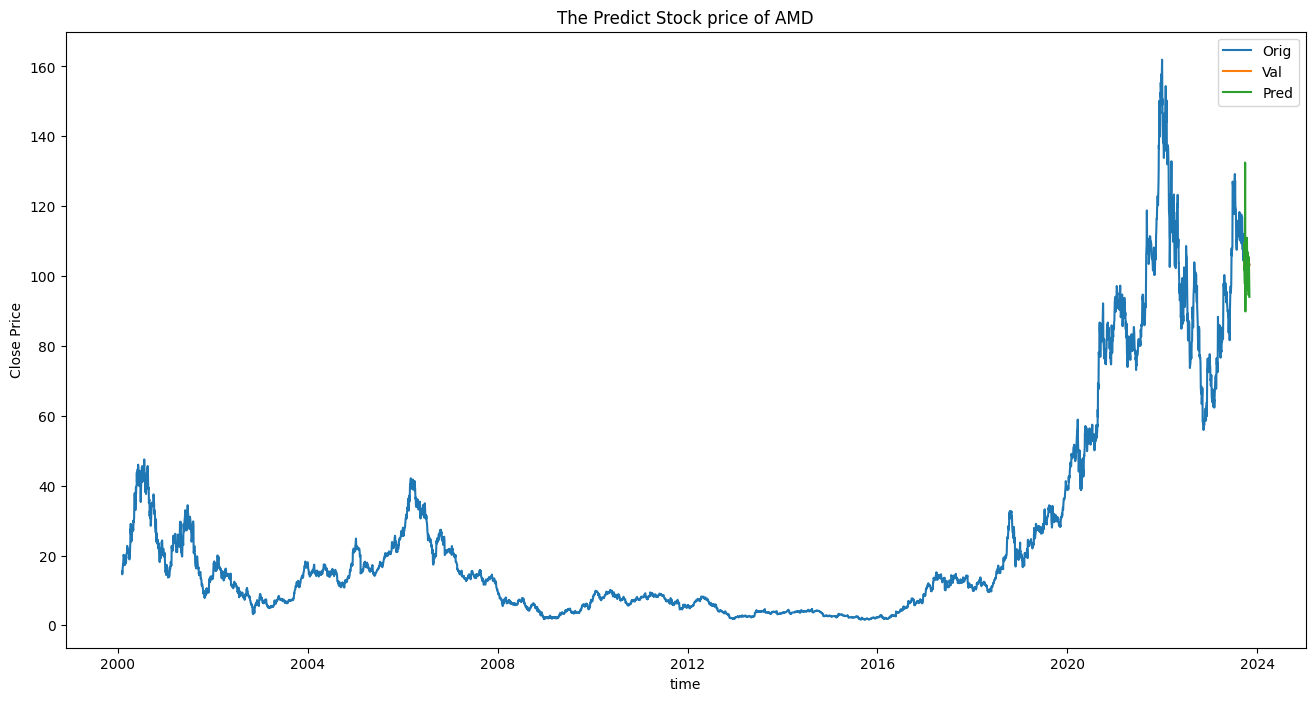

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2023-10-20    462.410004
2023-10-21    422.390015
2023-10-22    432.954315
2023-10-23    416.100006
2023-10-26    408.516327
2023-10-27    419.109985
2023-10-28    424.679993
2023-10-29    430.890015
2023-10-30    434.989990
2023-11-02    447.820007
Name: Prediction, dtype: float64


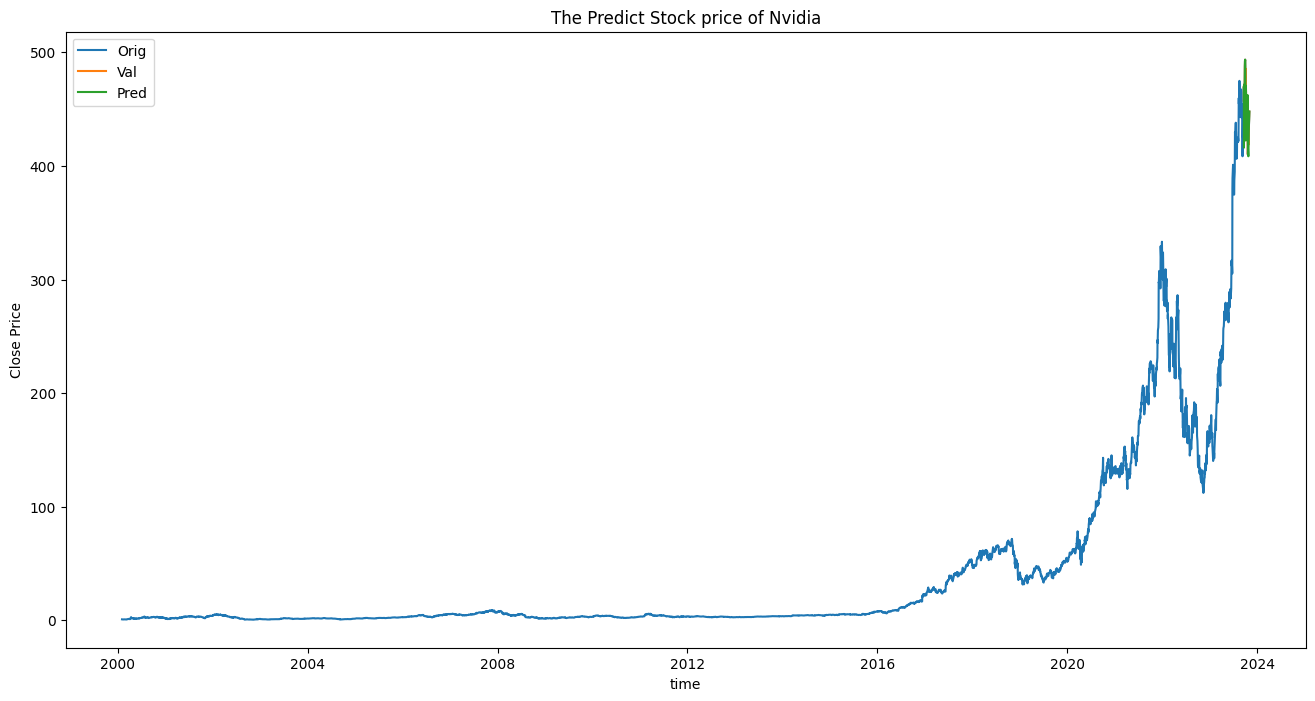

Market Share of Graphic Card Brands


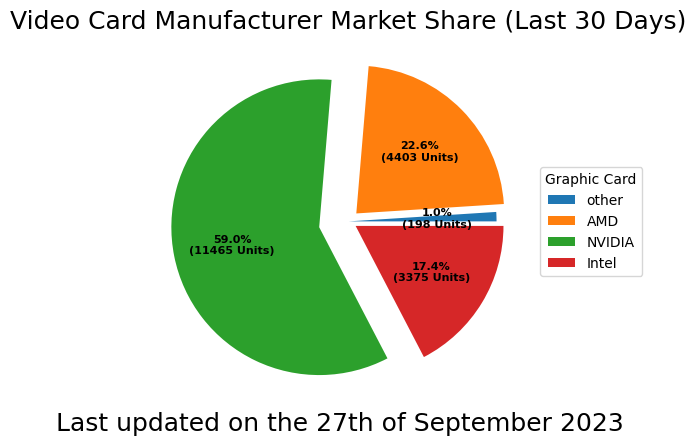

Performance of Graphic Card


Price (USD) per Performance of Graphic Card


Polynomial Regression Line of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
import plotly
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

    
def ma(df):
    for i in [60,120,250]:
        df[f"MA_{i}"] = df["Close"].rolling(i).mean()
    df = df.dropna()
    

def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None


def magraph(df):
    global fig
    fig = plt.figure()
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'], high=df['High'],
                                low=df['Low'], close=df['Close'],
                                showlegend=True, name='Close Price'),row=1,col=1)
    fig.add_scatter(x=df.index, y=df['MA_60'], name='MA60')
    fig.add_scatter(x=df.index, y=df['MA_120'], name='MA120')
    fig.add_scatter(x=df.index, y=df['MA_250'], name='MA250')
    fig.add_trace(go.Scatter(x=df.index, y=df.Volume,
                        showlegend=True, name='Volume',
                        marker=dict(color='rgb(125,125,222)')),row=2,col=1)
    
    name = get_variable_name(df).upper()
    name = name[3:]
    fig.update_layout(title=f'{name} Share Price (Close) US$',
                    xaxis_rangeslider_visible=False,width = 1300,height = 600)
    fig.show()
    
    return fig
    
    
def reset():
    global df_amd_2000, df_nvda_2000
    df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

    df_nvda_2000 = df_nvda_2000[['Close']].dropna()

    df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

    df_amd_2000 = df_amd_2000[['Close']].dropna()
    
    return df_amd_2000, df_nvda_2000
 
 
def future(df, future):
    i=future
    df['Prediction'] = df[['Close']].shift(-i)
    X = np.array(df.drop(['Prediction'],axis=1))[:-i]
    y = np.array(df['Prediction'])[:-i]
    pd.options.mode.chained_assignment = None 
    global graph
    df['Date'] = df.index
    df['day shift'] = int(i+1)
    df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    df = df.drop(['Date'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)

    graph = plt.figure(figsize=(16,8))
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    
    pd.set_option('display.max_rows', 9999)
    valid = valid['Prediction']

    return print(valid.drop(columns = ['Close']).tail(10)), graph


print('MA Graph of AMD and Nvidia')

df_nvda = yf.download('NVDA', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
df_amd = yf.download('AMD', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
ma(df_nvda)
ma(df_amd)
magraph(df_nvda)
magraph_nvda = fig
magraph(df_amd)
magraph_amd = fig

print('Prediction of AMD and Nvidia')

df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2000 = df_nvda_2000[['Close']].dropna()
df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2000 = df_amd_2000[['Close']].dropna()


reset()
future(df_amd_2000,30)
plt.title('The Predict Stock price of AMD')
plt.show()


reset()
future(df_nvda_2000,30)
plt.title('The Predict Stock price of Nvidia')
plt.show()


print('Market Share of Graphic Card Brands')

data = ['198 other','4403 AMD','11465 NVIDIA','3375 Intel']
units = [int(x.split()[0]) for x in data]
grapic_cards = [x.split()[-1] for x in data]
myexplode = [x / max(units)/5 for x in units]
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return '{:.1f}%\n({:d} Units)'.format(pct,absolute)
wedges, text, autotexts = plt.pie(units,autopct=lambda pct:func(pct,units),
                                 textprops = dict(color='black'),explode=myexplode)
plt.legend(wedges,grapic_cards,title='Graphic Card',
          loc = 'center left',bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=8,weight='bold')
plt.title("Video Card Manufacturer Market Share (Last 30 Days)", fontsize=18)
plt.suptitle("Last updated on the 27th of September 2023", fontsize=18,x=0.5,y=0.1)
plt.show()


print('Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["GeForce RTX 4090 (Nvidia)", "GeForce RTX 4080 (Nvidia)", "Radeon PRO W7800 (AMD)", "GeForce RTX 4070 Ti (Nvidia)", "Radeon RX 7900 XTX (AMD)"],
    G3Dmark = [38939, 34822, 32146, 31651, 31140]))

fig1 = px.bar(df, x = 'G3Dmark', y = 'grapic_cards',color = 'grapic_cards',color_discrete_sequence=[
                 "green", "green", "red", "green", "red"],width = 1300,height = 600)
fig1.update(layout_xaxis_range = [30000,40000],layout_title_text = 'Performance',layout_xaxis_title="G3D mark",layout_yaxis_title="Grapic Cards")
fig1.show()


print('Price (USD) per Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["Radeon RX 6650 XT (AMD)", "GeForce RTX 3060 (Nvidia)", "GeForce RTX 2060 (Nvidia)", "Radeon RX 6600M (AMD)","GeForce RTX 4060 (Nvidia)"],
    G3Dmark_Price = [76.2, 71.4, 67.2, 64.8, 64.6]))

fig2 = px.bar(df, x = 'G3Dmark_Price', y = 'grapic_cards',color='grapic_cards',color_discrete_sequence=[
                 "red", "green", "green", "red", "green"],width = 1300,height = 600)
fig2.update(layout_xaxis_range = [60,80],layout_title_text = 'Performance / Price (USD)',layout_xaxis_title="G3D mark / Price (USD)",layout_yaxis_title="Grapic Cards")
fig2.show()


print('Polynomial Regression Line of AMD and Nvidia')

df_nvda_2018 = yf.download('NVDA', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2018 = df_nvda_2018[['Close']].dropna()
df_nvda_2018['Date'] = df_nvda_2018.index
df_amd_2018 = yf.download('AMD', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2018 = df_amd_2018[['Close']].dropna()
df_amd_2018['Date'] = df_amd_2018.index

df = df_nvda_2018
fig3 = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Nvidia Polynomial Regression Line",width = 1300,height = 600)
fig3.show()


plotly.offline.plot(fig3,include_plotlyjs=False, output_type='div')
df = df_amd_2018
fig4 = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="AMD Polynomial Regression Line",width = 1300,height = 600)
fig4.show()

### Create HTML Files

In [17]:
plotly.offline.plot(magraph_nvda, filename = 'magraph_nvda.html')
plotly.offline.plot(magraph_amd, filename = 'magraph_amd.html')
plotly.offline.plot(fig1, filename = 'fig1.html')
plotly.offline.plot(fig2, filename = 'fig2.html')
plotly.offline.plot(fig3, filename = 'fig3.html')
plotly.offline.plot(fig4, filename = 'fig4.html')


'fig4.html'

### HTML Code

In [18]:
<!-- Delete the following column from HTML file by Seaching  -->
[*********************100%%**********************]  1 of 1 completed

<!-- Add After Line Number 7679 -->
<script src="./plotly-latest.min.js"></script>
</div>                      
<iframe src='magraph_nvda.html', width=2000, height=600></iframe>
</div>  
<br />
</div>  
<iframe src='magraph_amd.html', width=2000, height=600></iframe>
</div>  
<br />

<!-- Add After Line Number 7777 -->               
</div> 
<br />    
</div>                        
<iframe src='fig1.html', width=2000, height=600></iframe>
</div>
<br />

<!-- Add After Line Number 7792 -->                    
<br />
</div>
<iframe src='fig2.html', width=2000, height=600></iframe>
</div>
<br />

<!-- Add After Line Number 7807 -->                    
<br />
</div>
<iframe src='fig3.html', width=2000, height=600></iframe>
</div>
<br />
</div>
<iframe src='fig4.html', width=2000, height=600></iframe>



SyntaxError: invalid syntax (2038505396.py, line 1)